In [1]:
import pandas as pd
import numpy as np
import matplotlib.gridspec
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from adjustText import adjust_text

In [2]:
#Load in all genes from the analysis
taiji_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_ALLGENES.csv')
taiji_genes_set = set(taiji_genes['Genes'])

In [4]:
#Load in the LogFC RNA seq:
logfc_df = pd.read_csv('/ix3/djishnu/Alisa/Tfh/correct_direction_sign_change_rna_earlyvsGC_Thresh_log2FC.csv')
merged_df = average_df.merge(logfc_df, on='Genes', how='left')

#Load in Taiji results from all ranks. 
atac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/ATAC_RNA/output_atac/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", "Early_Pre_TFH":'Early Extra-GC', 'Late_Pre_TFH': 'Late Extra-GC'}).set_index("Genes")
H3K4me1_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K4me1_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")
H3K4me3_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K4me3_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")
H3K27Ac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/Taiji/CUTnRUN_H3K27Ac_RNA/output_cutnrun/GeneRanks.tsv', sep='\t').rename(columns={'Unnamed: 0':"Genes", 'CXCR5pos_PD1neg': 'Early Extra-GC', 'CXCR5pos_PD1int': 'Late Extra-GC', 'CXCR5hi_PD1hi': 'GC'}).set_index("Genes")

# Concatenate and compute mean across available values
average_df = pd.concat([atac_genes, H3K4me1_genes, H3K4me3_genes, H3K27Ac_genes]).groupby(level=0).mean()
average_df = average_df.reset_index()
average_df = average_df[["Genes", "Naive", "Early Extra-GC", "Late Extra-GC", "GC"]]

In [5]:
#Calculate Taiji Rank Importance
merged_df['Importance'] = np.log2(merged_df['GC'] / merged_df['Early Extra-GC'])
merged_df = merged_df.set_index("Genes")

{'TGIF1', 'VEZF1', 'ZNF441', 'SP1', 'SPIB', 'KLF13', 'CREM', 'GTF2B', 'KLF6', 'E2F4', 'ZNF543', 'FOS', 'POU2F1', 'BCL11A', 'AHR', 'ZNF333', 'PBX3', 'ZNF384', 'MAF', 'ZBTB17', 'NR4A2', 'ZNF519', 'ETS1', 'KLF12', 'ZEB1', 'NRF1', 'ATF3', 'RREB1', 'KLF10', 'STAT6', 'BCL6', 'ZNF557', 'TCF12', 'ZNF460', 'GABPA', 'FOXO3', 'HSF1', 'SREBF2', 'NFATC2', 'ZNF891', 'RORA', 'ATF6B', 'NFAT5', 'SP4', 'ZNF341', 'ZNF548', 'ZNF148', 'MEF2D', 'IRF2', 'NR2F6', 'ZNF180', 'ZNF611', 'REL', 'ZNF274', 'IRF3', 'STAT2', 'KLF2', 'ZNF846', 'ELF4', 'IRF9', 'THAP11', 'NFYC', 'ZBTB33', 'NR4A1', 'EGR1', 'SATB1', 'ZNF766', 'FOXJ2', 'ZFX', 'ZNF281', 'NFYB', 'FOSL2', 'ZNF354C', 'ZNF200', 'ZNF182', 'CTCF', 'ELF1', 'REST', 'ZNF776', 'YY1', 'FOXJ3', 'NR3C1', 'ELF2', 'FLI1', 'PAX5', 'ZNF76', 'KLF4', 'ZNF331', 'GTF2I', 'JUN', 'ZNF121', 'FOXK1', 'IRF4', 'BATF', 'RUNX1', 'TCF7', 'ELK1', 'MZF1', 'ZFP82', 'ZNF143', 'IRF7', 'FOXN3', 'ELK3', 'JUNB', 'EGR2', 'CREB1', 'ZNF713', 'ELK4', 'MAZ', 'YBX1', 'SP3', 'KLF3', 'RFX5', 'HIF1A', 'M

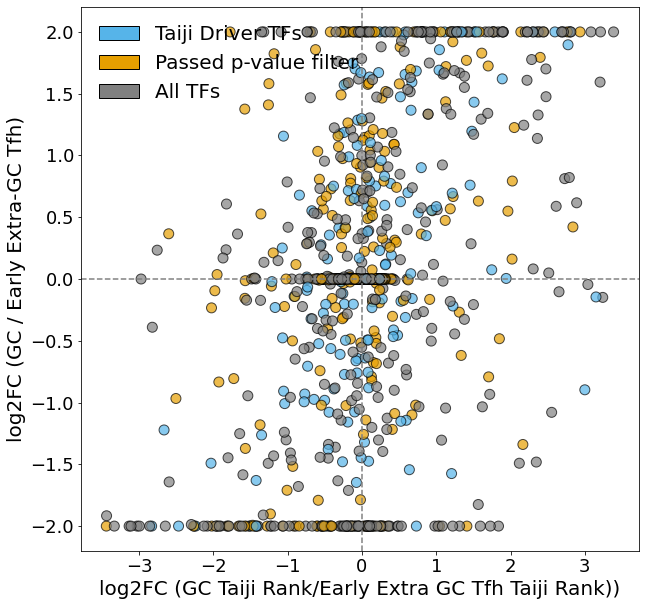

In [6]:
# Load the gene list for highlighting (e.g., 'target genes')

taiji_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_ALLGENES.csv')
taiji_genes_set = set(taiji_genes['Genes'])

# Load the p-value filtered list (e.g., significant genes only)
pval_filtered_df = pd.read_csv("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_152.csv")  # One column: 'Gene'
significant_genes = set(pval_filtered_df['Genes'])
print(significant_genes)



# Categorize genes
def assign_color(gene):
    if gene in significant_genes:
        return '#56B4E9'            # In the highlight list
           # Failed p-value filter
    if gene in taiji_genes_set:
        return "#E69F00"
    else:
        return 'grey'       # Other

# Assume merged_df index is gene names
merged_df['Color'] = merged_df.index.map(assign_color)

# Plot
fig = plt.figure(figsize=(10, 10))

sc = plt.scatter(
    merged_df['Importance'],
    merged_df['LogChange_Thresh'],
    c=merged_df['Color'],
    edgecolor='k',
    alpha=0.7,
    s=100
)

plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.ylabel('log2FC (GC / Early Extra-GC Tfh)', fontsize=20)
plt.xlabel('log2FC (GC Taiji Rank/Early Extra GC Tfh Taiji Rank))', fontsize=20)

plt.tick_params(axis='both', labelsize=18)

# Optional legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#56B4E9', edgecolor='k', label='Taiji Driver TFs'),
    Patch(facecolor='#E69F00', edgecolor='k', label='Passed p-value filter'),
    Patch(facecolor='gray', edgecolor='k', label='All TFs')
]
plt.legend(handles=legend_elements, fontsize=20, frameon=False)

In [7]:
# Save as PNG
fig.savefig("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_allTFs_correcteddirection_logthresh_difTaijiRank.png", dpi=300, bbox_inches='tight')

# Save as PDF
fig.savefig("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_allTFs_correcteddirection_logthresh_difTaijiRank.png.pdf", bbox_inches='tight')
